<a href="https://colab.research.google.com/github/devikamsba2024/Machine_Learning/blob/main/houseprice_Prediction_NueralNWs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression

# Exploring and Processing the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [ ]:
#!conda install pandas
#!pip3 install pandas
import pandas as pd

Here we enter the path to out data. It is *very* important to get this correct.

In [ ]:
df = pd.read_csv('./house-prices-example.csv')
df = df.iloc[:,1:] #remove former index column because irrelevant noise
df_1 = df.drop(['calculatedbathnbr', 'lotsizesquarefeet.1','roomcnt'], axis=1) #Removing these columns either they are repeated or they are loss

Now we can look at the top 10 items in the dataframe. Notice the 13 different variables we have. We will use the first 12 to predict the final value, the tax appraisal.

In [ ]:
df.head(10)

,lotsizesquarefeet,buildingqualitytypeid,calculatedbathnbr,bathroomcnt,bedroomcnt,regionidcity,regionidneighborhood,regionidzip,yearbuilt,roomcnt,lotsizesquarefeet.1,calculatedfinishedsquarefeet,structuretaxvaluedollarcnt
0,40247.0,7.0,2.0,2.0,2.0,12447.0,13327.0,96072.0,2004.0,0.0,40247.0,1090.0,232897.0
1,5420.0,4.0,2.0,2.0,4.0,12447.0,268496.0,96018.0,1957.0,0.0,5420.0,1931.0,124789.0
2,9085.0,8.0,2.0,2.0,3.0,12447.0,268588.0,96339.0,1962.0,0.0,9085.0,1766.0,120205.0
3,34845.0,9.0,3.0,3.0,5.0,12447.0,268588.0,96339.0,1995.0,0.0,34845.0,3085.0,378688.0
4,11009.0,8.0,3.0,3.0,5.0,12447.0,268588.0,96339.0,1965.0,0.0,11009.0,2401.0,162046.0
5,12910.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1984.0,0.0,12910.0,2397.0,274403.0
6,10095.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1981.0,0.0,10095.0,2574.0,239616.0
7,11119.0,8.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1965.0,0.0,11119.0,2225.0,208572.0
8,9787.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1983.0,0.0,9787.0,2661.0,258245.0
9,8280.0,6.0,3.0,3.0,4.0,12447.0,268588.0,96342.0,1960.0,0.0,8280.0,1830.0,132311.0


In [ ]:
df_1.head()

,lotsizesquarefeet,buildingqualitytypeid,bathroomcnt,bedroomcnt,regionidcity,regionidneighborhood,regionidzip,yearbuilt,calculatedfinishedsquarefeet,structuretaxvaluedollarcnt
0,40247.0,7.0,2.0,2.0,12447.0,13327.0,96072.0,2004.0,1090.0,232897.0
1,5420.0,4.0,2.0,4.0,12447.0,268496.0,96018.0,1957.0,1931.0,124789.0
2,9085.0,8.0,2.0,3.0,12447.0,268588.0,96339.0,1962.0,1766.0,120205.0
3,34845.0,9.0,3.0,5.0,12447.0,268588.0,96339.0,1995.0,3085.0,378688.0
4,11009.0,8.0,3.0,5.0,12447.0,268588.0,96339.0,1965.0,2401.0,162046.0


The dataset that we have now is in what we call a pandas dataframe. However, arrays are easier to use for analytics and data mining. So, to convert it to an array, simply access its values:

In [ ]:
dataset = df.values
dataset_1=df_1.values #Creating Dataset to build model 2

In [ ]:
dataset

array([[4.02470e+04, 7.00000e+00, 2.00000e+00, ..., 4.02470e+04,
        1.09000e+03, 2.32897e+05],
       [5.42000e+03, 4.00000e+00, 2.00000e+00, ..., 5.42000e+03,
        1.93100e+03, 1.24789e+05],
       [9.08500e+03, 8.00000e+00, 2.00000e+00, ..., 9.08500e+03,
        1.76600e+03, 1.20205e+05],
       ...,
       [4.65600e+03, 4.00000e+00, 2.00000e+00, ..., 4.65600e+03,
        1.11400e+03, 6.82760e+04],
       [4.84000e+03, 4.00000e+00, 2.00000e+00, ..., 4.84000e+03,
        1.43600e+03, 9.51010e+04],
       [4.07900e+03, 6.00000e+00, 2.00000e+00, ..., 4.07900e+03,
        1.27000e+03, 6.36380e+04]])

Now, we split the dataset into our input features and the label we wish to predict.

In [ ]:
X = dataset[:,0:12]
Y = dataset[:,12]

X_1 = dataset_1[:,0:9]
Y_1 = dataset_1[:,9]

In [ ]:
X_1.shape

(904287, 9)

In [ ]:
Y_1.shape

(904287,)

In [ ]:
X.shape

(904287, 12)

In [ ]:
Y.shape

(904287,)

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [ ]:
#!conda install sklearn
#!pip3 install sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_1_scale = min_max_scaler.fit_transform(X_1)

In [ ]:
X_scale

array([[6.09901968e-03, 5.45454545e-01, 5.26315789e-02, ...,
        0.00000000e+00, 6.09901968e-03, 1.83893683e-02],
       [8.02394530e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 8.02394530e-04, 3.25908914e-02],
       [1.35978194e-03, 6.36363636e-01, 5.26315789e-02, ...,
        0.00000000e+00, 1.35978194e-03, 2.98046235e-02],
       ...,
       [6.86202449e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 6.86202449e-04, 1.87946436e-02],
       [7.14185882e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 7.14185882e-04, 2.42320877e-02],
       [5.98450052e-04, 4.54545455e-01, 5.26315789e-02, ...,
        0.00000000e+00, 5.98450052e-04, 2.14289333e-02]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [ ]:
from sklearn.model_selection import train_test_split

First, we split the training data. The remaining 30% of the data is used for testing and validation.

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_1_train, X_1_val_and_test, Y_1_train, Y_1_val_and_test = train_test_split(X_1_scale, Y_1, test_size=0.3)

So, we next need to split our training and validation data.

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
X_1_val, X_1_test, Y_1_val, Y_1_test = train_test_split(X_1_val_and_test, Y_1_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(633000, 12) (135643, 12) (135644, 12) (633000,) (135643,) (135644,)


In [ ]:
print(X_1_train.shape, X_1_val.shape, X_1_test.shape, Y_1_train.shape, Y_1_val.shape, Y_1_test.shape)

(633000, 9) (135643, 9) (135644, 9) (633000,) (135643,) (135644,)


# Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [ ]:
#!conda install tensorflow
!pip3 install tensorflow

In [ ]:
from tensorflow import keras

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(12, activation='elu', input_shape=(12,)),
    keras.layers.Dense(32, activation='elu'),
    keras.layers.Dense(16, activation='elu'),
    keras.layers.Dense(1, activation='linear'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [ ]:
adam = keras.optimizers.Adam()#lr=0.001)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=1024, epochs=30,
          validation_data=(X_val, Y_val))


Epoch 1/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 74328915968.0000 - mae: 172810.8438 - mse: 74328915968.0000 - val_loss: 67446706176.0000 - val_mae: 162618.9844 - val_mse: 67446706176.0000
Epoch 2/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 62405996544.0000 - mae: 149157.8594 - mse: 62405996544.0000 - val_loss: 44301819904.0000 - val_mae: 96259.5391 - val_mse: 44301819904.0000
Epoch 3/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 41705381888.0000 - mae: 93877.1406 - mse: 41705381888.0000 - val_loss: 37413257216.0000 - val_mae: 98829.7891 - val_mse: 37413257216.0000
Epoch 4/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 38133342208.0000 - mae: 99306.3203 - mse: 38133342208.0000 - val_loss: 35301908480.0000 - val_mae: 91974.5938 - val_mse: 35301908480.0000
Epoch 5/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34492948480.0000 - mae: 90880.6484 - mse: 34492948480.0000 - val_loss: 30653755392.0000 - val_mae: 82289.2578 - val_mse: 30653755392.0000
Epoch 

In [ ]:

model_1 = keras.models.Sequential([
    keras.layers.Dense(9, activation='elu', input_shape=(9,)),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(32, activation='elu'),
    keras.layers.Dense(1, activation='linear'),
])
adam_1=keras.optimizers.Adam(learning_rate=0.1)#lr=0.001)
model_1.compile(loss='mse', optimizer=adam_1, metrics=['mse','mae'])


hist_1 = model_1.fit(X_1_train, Y_1_train,batch_size=256, epochs=30,validation_data=(X_1_val, Y_1_val))

Epoch 1/30
2473/2473 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 22885298176.0000 - mae: 78476.2031 - mse: 22885298176.0000 - val_loss: 20974090240.0000 - val_mae: 65809.5703 - val_mse: 20974090240.0000
Epoch 2/30
2473/2473 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 17483094016.0000 - mae: 66794.7812 - mse: 17483094016.0000 - val_loss: 20566411264.0000 - val_mae: 65020.0391 - val_mse: 20566411264.0000
Epoch 3/30
2473/2473 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 17137207296.0000 - mae: 65970.2344 - mse: 17137207296.0000 - val_loss: 21322915840.0000 - val_mae: 67963.3828 - val_mse: 21322915840.0000
Epoch 4/30
2473/2473 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 16231111680.0000 - mae: 65764.5156 - mse: 16231111680.0000 - val_loss: 20661970944.0000 - val_mae: 63906.9375 - val_mse: 20661970944.0000
Epoch 5/30
2473/2473 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 17817765888.0000 - mae: 66027.2109 - mse: 17817765888.0000 - val_loss: 20647172096.0000 - val_mae: 63646.2227 - val_mse: 20647172096.000

Understanding our results:

In [ ]:
df.structuretaxvaluedollarcnt.mean()

172874.90233189243

# Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [ ]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

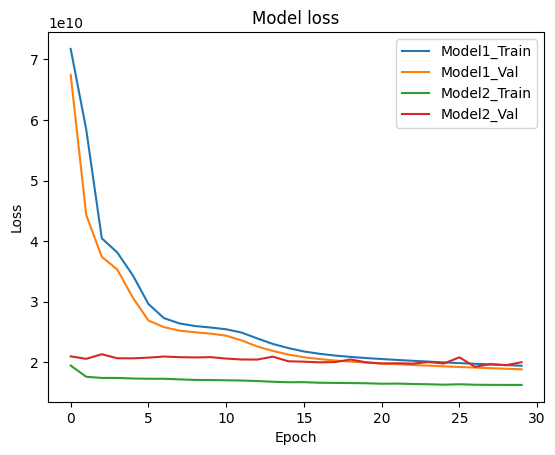

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model1_Train', 'Model1_Val','Model2_Train','Model2_Val'], loc='upper right')
plt.show()

Now we can computer performance on the test set, to see how the model performs on real data that hasn't been seen before.

In [ ]:
predictions = model.predict(X_test)


4239/4239 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [ ]:
predictions_1 = model_1.predict(X_1_test)

4239/4239 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [ ]:
#!conda install numpy
!pip3 install numpy

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import numpy as np

In [ ]:
print(mean_absolute_error(Y_test, predictions))
print(mean_absolute_error(Y_1_test, predictions_1))

69603.06372672907
63095.809059536565


In [ ]:
print(f"MSE for model 1: {mean_squared_error(Y_test, predictions)}")
print(f"MSE for model 1: {mean_squared_error(Y_1_test, predictions_1)}")
print(f"RMSE for model 2: {math.sqrt(mean_squared_error(Y_test, predictions))}")
print(f"RMSE for model 2: {math.sqrt(mean_squared_error(Y_1_test, predictions_1))}")

MSE for model 1: 17355677739.22961
MSE for model 1: 15423546904.642752
RMSE for model 2: 131740.94936362654
RMSE for model 2: 124191.57340432865




###Steps I Performed
#### Analyzed the dataset to understand the features.
#### Identified *calculatedbathnbr*, *lotsizesquarefeet.1*, and *roomcnt* as redundant or noise.
#### Removed these features and built a model, with minimal improvement in MSE.
#### Increased the number of units in the hidden layers and adjusted the learning rate to 0.01, resulting in a 2% improvement.
#### Further adjusted the learning rate to 0.1 and batch size to 514, achieving a 5% overall improvement.
#### Finally, reduced the batch size to 256, leading to a 11.13% overall improvement.

### https://chatgpt.com/share/6711d61c-4380-8006-a59d-16d09b13cd25